# Abstract 
We introduce an object detection dataset named Lacmus, aiming at specific task - find missing people on the drone images. The images in the dataset were captured over grass and small trees areas of 5 different locations across Russia Central Region. Lacmus dataset has more than 5000 annotated instances in 1552 images with annotations, including Pedestrian bounding boxes. Having the specific purpose, such dataset enables extensive evaluation and investigation of visual analysis algorithms on the drone platform. We hope the dataset boost both the research and development, that helps to save the lives of missing people. 

## Introduction
According to rough estimates, more than one hundred thousand people disappear in Russia every year. A significant part of them are people who have lost their way far from human habitation. Fortunately, some of the lost are chosen by themselves, and volunteer search and rescue teams are mobilized to help others. 
The main search methods at the moment, in the XXI century, are on foot combing the surroundings using technical means, which are often no more complicated than a siren or a buzzing beacon. The topic, of course, is relevant and hot, generates many ideas for using in search of achievements of scientific and technological progress; some of them are even embodied in the form of prototypes and tested at specially organized competitions. But a forest is a forest, and the real conditions of the search, coupled with limited material resources, make this problem difficult and still very far from a complete solution.
In recent years, rescuers have increasingly used unmanned aerial vehicles (UAVs) to inspect large areas of the territory, photographing the area from a height of 40-50 m. From one search and rescue operation, several thousand photos are obtained, which today the volunteers look at manually. It is clear that such processing is long and inefficient. After two hours of such work, the volunteers get tired and cannot continue the search, but people's health and lives depend on its speed.
Together with search and rescue teams, we are developing a program to search for missing people in images taken from UAVs. As machine learning specialists, we try to make the search automatic and fast.

### Related works 

The VisDrone dataset is currently widely used for evaluating unmanned aerial vehicle (UAV) object detection. It was curated and created by the Machine Learning and Data Mining Laboratory team at Tianjin University in 2018. The dataset comprises 10,209 images, with 6471 images allocated for training, 548 images for validation, and 3190 images for testing. It encompasses a total of 10 object categories, namely, pedestrian, people, bicycle, car, van, truck, tricycle, awning-tricycle, bus, and motorbike.

UAVDT is a dataset for single-object tracking and multi-object tracking tasks, with a resolution of 1024 × 540 pixels and a total of 80,000 frames from 100 videos. Each frame is annotated with three object classes: cars, buses, and trucks. Due to the specific nature of the original annotations, in this study, only frames from the multi-object tracking task were used for object detection.

SeaDronesSee is a large-scale data set aimed at helping develop systems for Search and Rescue (SAR) using Unmanned Aerial Vehicles (UAVs) in maritime scenarios. Building highly complex autonomous UAV systems that aid in SAR missions requires robust computer vision algorithms to detect and track objects or persons of interest. This data set provides three sets of tracks: object detection, single-object tracking and multi-object tracking. Each track consists of its own data set and leaderboard. Object Detection part contains 5,630 train images, 859 validation images, 1,796 testing images.  

A special database called HERIDAL was compiled for training purposes, and it contains over 68,750 image patches of wilderness acquired from an aerial perspective as well as approximately 500 labelled full-size real-world images intended for testing purposes. The proposed method achieved a detection rate of 88.9% and a precision of 34.8%, which demonstrates better effectiveness than the system currently used by Croatian Mountain search and rescue (SAR) teams (IPSAR), which is based on mean-shift segmentation. We also used the HERIDAL database to train and test a state-of-the-art region proposal network, Faster R-CNN (Ren et al. in Faster R-CNN: towards real-time object detection with region proposal networks, 2015. CoRR arXiv:1506.01497), which achieved comparable but slightly worse results than those of our proposed method.

SARD [68] comprises 1,981 manually labeled images extracted from video frames of persons simulating search and rescue situations in roads, quarries, grass land, and forested areas, under diverse weather conditions. However, both datasets lack rich generalization characteristics and environmental diversity. The recently published WiSARD [11] dataset, comprises the richest set of images associated with wilderness SAR scenarios, with 33,786 labeled RGB images, 22,156 labeled thermal images, and a subset consisting of 15,453 temporally synchronized visual-thermal image pairs. In addition to the useful multimodal imagery, the dataset includes environmental diversity across seasons and times of the day and night. WiSARD represents the richest dataset for blind search in wilderness scenarios, that is, search for any person on an area rather than the search for an specific person; NOMAD provides richer demographic diversity, includes man-made scenarios, provides rich metadata of actors, controlled multi-scales, and provides a new benchmark for occlusion. It is the only dataset, to our knowledge, to systematically address the issue of occlusion.  

Special aerial datasets have been created to apply in Emergency Response Scenarios. Natural Occluded Multiscale Aerial Dataset (NOMAD) presents a benchmark for human detection under occluded aerial views, with five different aerial distances and rich imagery variance. NOMAD is composed of 100 different Actors, all performing sequences of walking, laying and hiding. It includes 42,825 frames, extracted from 5.4k resolution videos, and manually annotated with a bounding box and a label describing 10 different visibility levels, categorized according to the
percentage of the human body visible inside the bounding box. This allows computer vision models to be evaluated on their detection performance across different ranges of occlusion. NOMAD is designed to improve the effectiveness of aerial search and rescue and to enhance collaboration between sUAS and humans, by providing a new benchmark dataset for human detection under occluded aerial views.   

### Dataset description 

Dataset has 1552 images with more than 5000 annotated objects. 
There are five folds of images collected from different areas and seasons: 
- 0 : 410 winter Moscow 2019;
- 411 : 768 summer Moscow 2019;
- 769 : 1036 spring Korolev 2019;
- 1037 : 1421 summer Tambov 2019;
- 1422 : 1551 summer Nnovgorod 2021.

In [2]:
import xml.etree.ElementTree as ET
import glob
from PIL import Image
import matplotlib.pyplot as plt

all_n_boxes = {}
ann_names = glob.glob('dataset/full_train_ds/Annotations/*.xml')

for ann in ann_names:
    tree = ET.parse(ann)
    root = tree.getroot()
    n_boxes = len(list(root.iter('bndbox')))
    all_n_boxes[ann] = n_boxes

print(f'Images: {len(all_n_boxes)}, Boxes: {sum(all_n_boxes.values())}')

Images: 1552, Boxes: 5134


In [3]:
img_names = glob.glob('dataset/full_train_ds/JPEGImages/*')
len(img_names)

1552

Most of images have resolution (4000,3000) and more. Some have less height about 2250 or 2280 px. 

<BarContainer object of 7 artists>

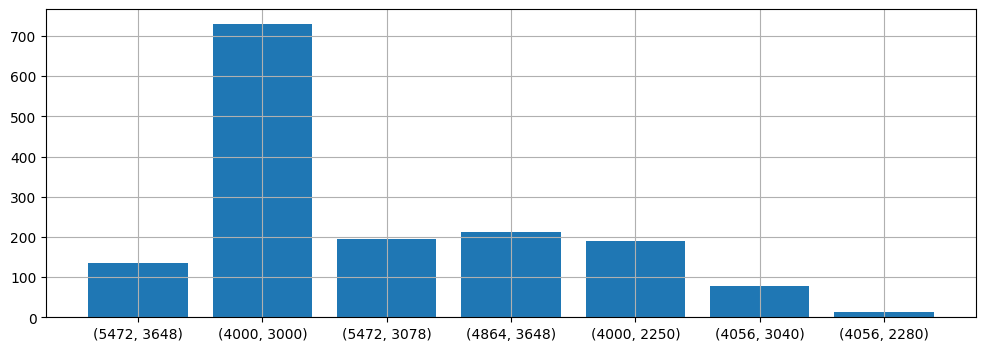

In [27]:
from collections import Counter

img_sizes = []
for img_n in img_names:
    img = Image.open(img_n)
    img_sizes.append(img.size)
    
c = Counter(img_sizes)
names = [str(k) for k in c.keys()]
values = list(c.values())
plt.figure(figsize=(12, 4))
plt.grid()
plt.bar(names, values)

(array([ 57., 475., 379., 219.,  95.,  49.,  50.,  45., 132.,  44.,   3.,
          1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 <BarContainer object of 12 artists>)

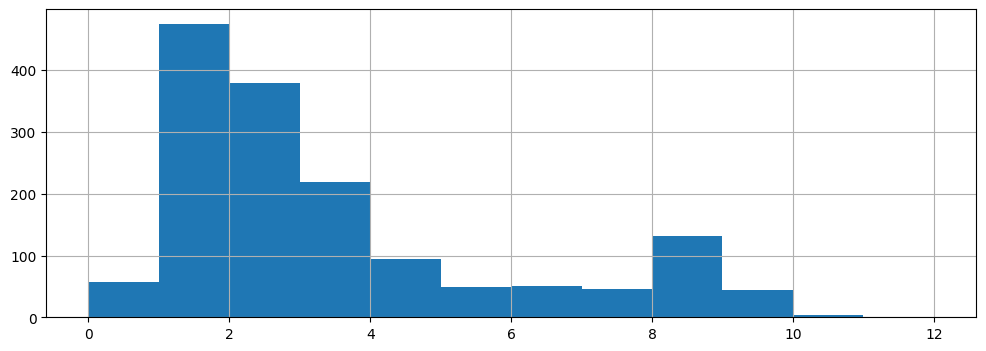

In [32]:
plt.figure(figsize=(12, 4))
plt.grid()
plt.hist(all_n_boxes.values(), bins=range(13))

We have some images with anomaly high number of bounding boxes. 

In [28]:
max_boxes = max(all_n_boxes.values())
print(f'Max number of boxes: {max_boxes}')

for k, v in all_n_boxes.items():
    if v == max_boxes:
        max_boxes_key = k
        print(k)

Max number of boxes: 320
dataset/full_train_ds/Annotations/915.xml


In [44]:
# We can remove it or fix wrong annotation?
# all_n_boxes.pop(max_boxes_key)

Dataset has many objects in this images:  
915.jpg - 320 objects  
1006.jpg - 168 objects  


Also, dataset has 57 backgroud images with no objects: 

In [8]:
# Here they are, but do we really need them?
no_boxes = ['1082', '1084', '1047', '1108', '1060', '1083', '1058', '1069', '1111', '1105', '1085', '1086', '1040', '1116', '1109', '1071', '354', '1062', '1046', '298', '1042', '1052', '1076', '1115', '1101', '1073', '1095', '1107', '1068', '1061', '1066', '160', '1092', '1053', '1057', '1037', '1114', '1038', '1041', '1112', '83', '1045', '1096', '1087', '1055', '1102', '1099', '1080', '1039', '1054', '1065', '1077', '1100', '1059', '1067', '1081', '1070']

In [9]:
len(no_boxes)

57

## Methods
 
Train yolov8[n,s,m,l,x] with different imgsz = [640, 1280, 1920] on different image crops [11, 21, 32].   

Hyperparams are [default](https://docs.ultralytics.com/modes/train/).  
Overrides: 
- optimizer='AdamW',
- lr0=0.001,
- lrf=0.001,
- mixup=0.5,
- flipud=0.5,
- box=15.

# Results

#### Original images

Precision / Recall, %

| input size | yolov8n | yolov8s  | yolov8m  | yolov8l  | yolov8x  |
|-------|---|---|---|---|---|
| 640   |   |   |   |   |   |
| 1280  |   |   |   |   |   |
| 1920  |   |   |   |   |   |

#### Crops 2x1  

Precision / Recall, %

| input size | yolov8n | yolov8s  | yolov8m  | yolov8l  | yolov8x  |
|-------|---|---|---|---|---|
| 640   |   |   |   |   |   |
| 1280  |   |   |   |   |   |
| 1920  |   |   |   |   |   |

#### Crops 3x2  
Precision / Recall, %
| input size | yolov8n | yolov8s | yolov8m  | yolov8l | yolov8x |
|-------     |---      |---      |---       |---      |---      |
| 640        | 26 / 40 |         | 41 / 42  |         | 34 / 40 |
| 1280       |   |   |   |   |   |
| 1920       |   |   |   |   |   |

## Discussion